In [1]:
import simpy
import random
import seaborn as sns

from common import tiempo_aleatorio_operador, aleatorio_exponencial
from common import nuevo_cliente, final_cliente

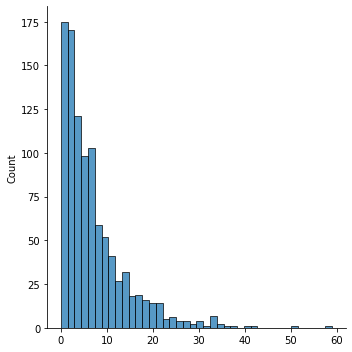

In [2]:
tiempos_clientes = []
for i in range(0,1000):
    t = aleatorio_exponencial(1/7)
    tiempos_clientes.append(t)
    
ax = sns.displot(tiempos_clientes)

## Declaracion de Objetos

### Objeto Operador

In [3]:
class Operador(object):
    def __init__(self, nombre, tiempo_prob):
        self.nombre = nombre
        self.tiempo_prob = tiempo_prob
        
    

### Objeto Evento

In [4]:
class Evento(object):
    def __init__(self, tipo, estado):
        self.tipo = tipo
        self.estado = estado
        

### Objeto Estado

In [5]:
class Estado(object):
    def __init__(self, tiempo, estado_operador, cola):
        self.tiempo = tiempo
        self.estado_operador = estado_operador
        self.cola = cola

# Operador 1

In [6]:
## Operador 1
dict_probabilidades = {
    (0,0.3):2,
    (0.3,0.5):2.5,
    (0.5,0.75):3,
    (0.75,1):4
}

operador_1 = Operador('operador_1', dict_probabilidades)

In [7]:
tiempos_op1 = []
for i in range(0,1000):
    t = tiempo_aleatorio_operador(operador_1.tiempo_prob)
    tiempos_op1.append(t)

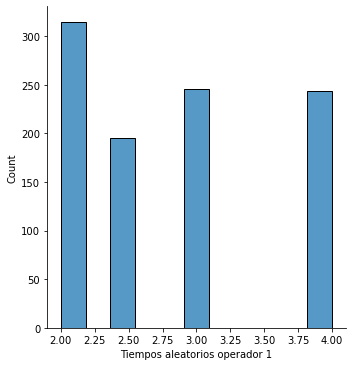

In [8]:
ax = sns.displot(tiempos_op1)
ax.set(xlabel="Tiempos aleatorios operador 1")

## Eventos

Tipos de evento:
- inicio
- nuevo_cliente
- final_cliente

# Simulacion

In [9]:
lista_eventos = []
lista_eventos_futuros = []

### Evento Inicial

In [10]:
# Tiempo = 0
# Estado operador = 0
# Cola = 0
estado_inicial = Estado(0, 0,0)

evento_inicial = Evento('inicio', estado_inicial)

In [11]:
lista_eventos_futuros.append(evento_inicial)

### Agregando Clientes

In [12]:
tiempo_clientes = 0
TOTAL_CLIENTES = 5

for i in range(TOTAL_CLIENTES):
    tiempo_clientes += aleatorio_exponencial(1/7)
    evento = Evento('nuevo_cliente', Estado(tiempo_clientes, 0,0))
    lista_eventos_futuros.append(evento)

In [13]:
estado_actual = Estado(0,0,0)

while (len(lista_eventos_futuros) > 0):
    
    #Obtenemos el siguiente evento futuro
    evento_actual = lista_eventos_futuros.pop(0)
    

    if evento_actual.tipo == 'nuevo_cliente':
        lista_eventos_futuros, estado_actual = nuevo_cliente(
            estado_actual,
            operador_1.tiempo_prob,
            evento_actual,
            lista_eventos_futuros
        )
        
    if evento_actual.tipo == 'final_cliente':
        lista_eventos_futuros, estado_actual = final_cliente(
            estado_actual,
            operador_1.tiempo_prob,
            evento_actual,
            lista_eventos_futuros
        )

    nuevo_estado = Estado(
        estado_actual.tiempo,
        estado_actual.estado_operador,
        estado_actual.cola
    )
    
    nuevo_evento = Evento(evento_actual.tipo, nuevo_estado)
    lista_eventos.append(nuevo_evento)
    

In [14]:
for evento in lista_eventos:
    print(f"=== Evento: {evento.tipo} ===")
    print(f"Cola: {evento.estado.cola}")
    print(f"Estado Operador: {evento.estado.estado_operador}")
    print(f">> Tiempo: {evento.estado.tiempo}")
    print()

=== Evento: inicio ===
Cola: 0
Estado Operador: 0
>> Tiempo: 0

=== Evento: nuevo_cliente ===
Cola: 0
Estado Operador: 1
>> Tiempo: 1.7312770139894245

=== Evento: nuevo_cliente ===
Cola: 1
Estado Operador: 1
>> Tiempo: 2.307016657763234

=== Evento: final_cliente ===
Cola: 0
Estado Operador: 1
>> Tiempo: 4.231277013989424

=== Evento: final_cliente ===
Cola: 0
Estado Operador: 0
>> Tiempo: 8.231277013989423

=== Evento: nuevo_cliente ===
Cola: 0
Estado Operador: 1
>> Tiempo: 16.358259820983122

=== Evento: final_cliente ===
Cola: 0
Estado Operador: 0
>> Tiempo: 18.358259820983122

=== Evento: nuevo_cliente ===
Cola: 0
Estado Operador: 1
>> Tiempo: 21.991310317309036

=== Evento: final_cliente ===
Cola: 0
Estado Operador: 0
>> Tiempo: 24.991310317309036

=== Evento: nuevo_cliente ===
Cola: 0
Estado Operador: 1
>> Tiempo: 31.223916966662216

=== Evento: final_cliente ===
Cola: 0
Estado Operador: 0
>> Tiempo: 35.223916966662216

